# Collection of Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import pymysql as sql

In [3]:
db=sql.connect('localhost','root','1234','hello')
cursor=db.cursor()
sql='SELECT * FROM train'
res=pd.read_sql_query(sql,db)
db.close()

In [4]:
res.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360.0,1.0,Urban,Y


In [5]:
res.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
528,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N
529,LP002912,Male,No,2,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,Urban,N
530,LP002912,Male,No,2,Graduate,Yes,NaN,NaN,NaN,NaN,0.0,Urban,N
531,LP002912,Male,No,2,Graduate,Yes,5467.0,2411.0,234.0,180.0,0.0,Urban,N
532,LP002912,Male,No,2,Graduate,Yes,5467.0,2411.0,234.0,180.0,0.0,Urban,N


In [6]:
#data=pd.read_csv('train.csv')

In [7]:
res.to_csv('loan_prediction.csv')  #This was necessary as data from database was not taking empty values to be null.

In [8]:
data=pd.read_csv('loan_prediction.csv')

In [9]:
print('Total No of Enteries in Dataset: '+str(len(data.index)))

Total No of Enteries in Dataset: 533


In [10]:
data.shape

(533, 14)

In [11]:
len(data)

533

In [12]:
data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,533.000000,531.00000,531.000000,531.000000,531.000000,532.000000
mean,266.000000,5507.66855,1545.666667,146.184557,341.740113,0.845865
std,154.008117,6392.03817,2520.091337,84.123359,65.499995,0.361418
min,0.000000,150.00000,0.000000,9.000000,36.000000,0.000000
25%,133.000000,2908.50000,0.000000,100.000000,360.000000,1.000000
50%,266.000000,3833.00000,1126.000000,128.000000,360.000000,1.000000
75%,399.000000,5807.50000,2250.000000,168.000000,360.000000,1.000000
max,532.000000,81000.00000,33837.000000,700.000000,480.000000,1.000000


In [13]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


In [15]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
528,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N
529,LP002912,Male,No,2,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,Urban,N
530,LP002912,Male,No,2,Graduate,Yes,NaN,NaN,NaN,NaN,0.0,Urban,N
531,LP002912,Male,No,2,Graduate,Yes,5467.0,2411.0,234.0,180.0,0.0,Urban,N
532,LP002912,Male,No,2,Graduate,Yes,5467.0,2411.0,234.0,180.0,0.0,Urban,N


# Data Analysis

Text(0,0.5,'Count')

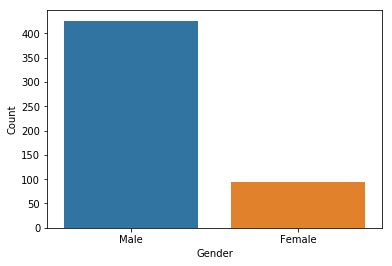

In [16]:
sns.countplot(x='Gender', data=data)
plt.ylabel('Count')

Text(0,0.5,'Count')

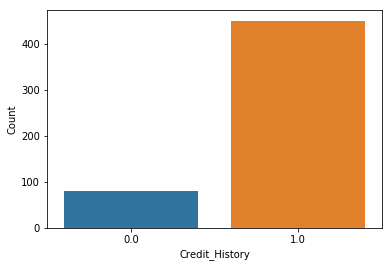

In [18]:
sns.countplot('Credit_History', data=data)
plt.ylabel('Count')

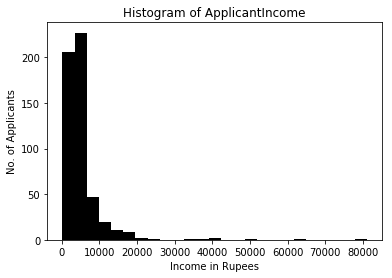

In [19]:
data['ApplicantIncome'].plot.hist( bins = 25, color='k')
plt.xlabel('Income in Rupees')
plt.ylabel('No. of Applicants')
plt.title('Histogram of ApplicantIncome')
plt.show()

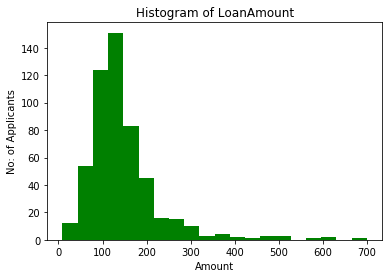

In [20]:
data['LoanAmount'].plot.hist( bins=20, color='g')
plt.xlabel('Amount')
plt.ylabel('No: of Applicants')
plt.title('Histogram of LoanAmount')
plt.show()

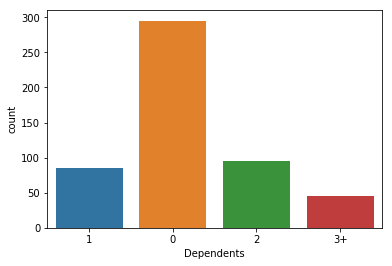

In [21]:
sns.countplot('Dependents', data=data)

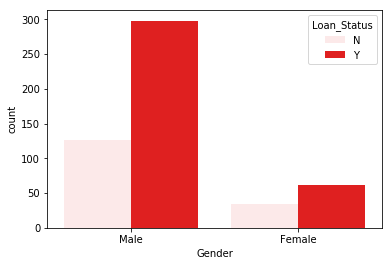

In [22]:
sns.countplot(x='Gender', hue='Loan_Status', data=data, color='r')

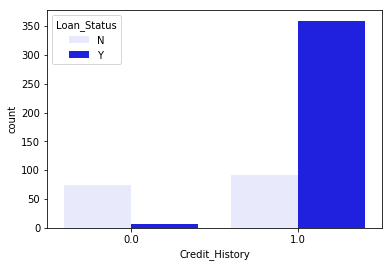

In [23]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data, color='b')

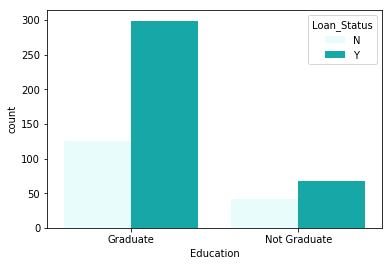

In [24]:
sns.countplot(x='Education', hue='Loan_Status', data=data, color='c')

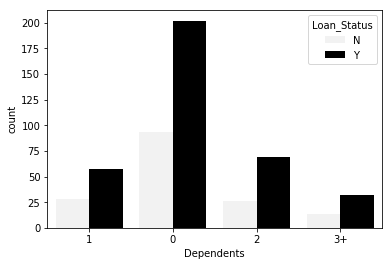

In [25]:
sns.countplot(x='Dependents', hue='Loan_Status', data=data, color='k')

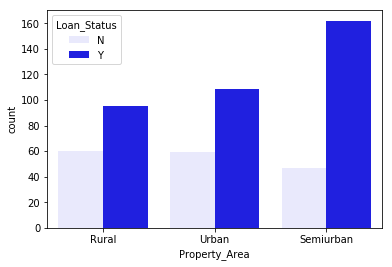

In [26]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, color='b')

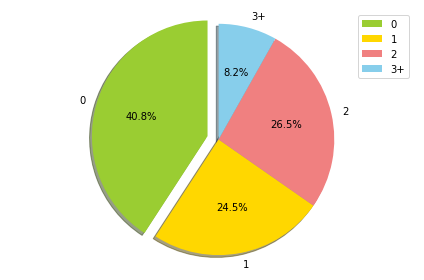

In [27]:
labels=['0','1','2','3+']
sizes=[100,60,65,20]
colors=['yellowgreen','gold','lightcoral','skyblue']
explodes=(0.1,0,0,0)   #lies btween 0 to 1
plt.pie(sizes,explode=explodes,labels=labels,
        colors=colors,autopct='%1.1f%%',
        shadow=True,startangle=90)
#plt.pie(sizes,colors=colors,shadow=True,startangle=90)
plt.legend(labels, loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

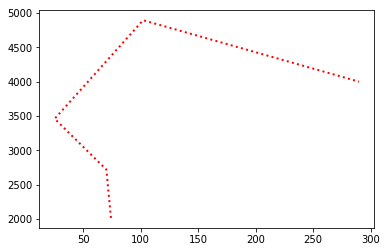

In [28]:
plt.plot(data.LoanAmount[105:110],data.ApplicantIncome[105:110],color='r',linewidth=2,linestyle='dotted')

# Data Wrangling

In [29]:
#Removal of unwanted columns
data.drop('Loan_ID', axis=1,inplace=True)

In [30]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
5,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
6,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
7,Male,Yes,2,Graduate,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y
8,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
9,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360.0,1.0,Urban,Y


In [31]:
data.info()   # tells non null values in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 12 columns):
Gender               520 non-null object
Married              530 non-null object
Dependents           520 non-null object
Education            532 non-null object
Self_Employed        507 non-null object
ApplicantIncome      530 non-null float64
CoapplicantIncome    530 non-null float64
LoanAmount           530 non-null float64
Loan_Amount_Term     530 non-null float64
Credit_History       531 non-null float64
Property_Area        532 non-null object
Loan_Status          532 non-null object
dtypes: float64(5), object(7)
memory usage: 50.0+ KB


In [32]:
data.isnull().head()   #returns true where data is null

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
data.isnull().sum()

Gender               12
Married               2
Dependents           12
Education             0
Self_Employed        25
ApplicantIncome       2
CoapplicantIncome     2
LoanAmount            2
Loan_Amount_Term      2
Credit_History        1
Property_Area         0
Loan_Status           0
dtype: int64

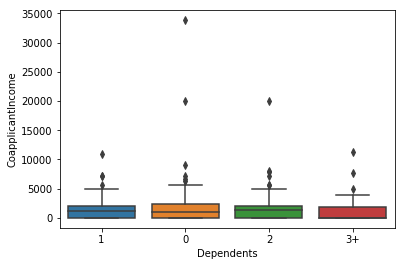

In [34]:
sns.boxplot(y='CoapplicantIncome',x='Dependents',data=data)

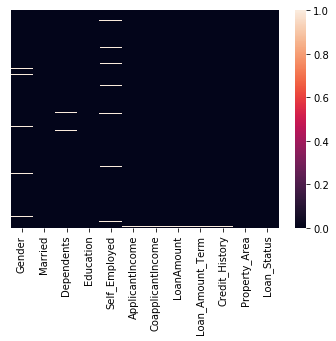

In [35]:
sns.heatmap(data.isnull(),yticklabels=False, color='g')

In [36]:
data.dropna(inplace=True)

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y


In [38]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

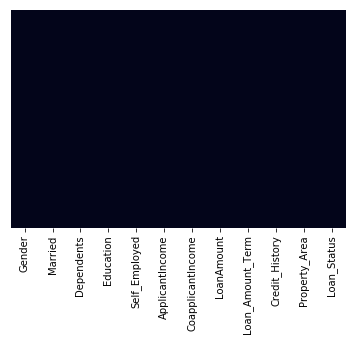

In [39]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [40]:
gen=pd.get_dummies(data['Gender'])

In [41]:
edu=pd.get_dummies(data['Education'])

In [42]:
prop=pd.get_dummies(data['Property_Area'])

In [43]:
data=pd.concat([data,gen,edu,prop],axis=1)

In [44]:
data.drop(['Education','Not Graduate','Property_Area','Rural','Gender','Female'], axis=1, inplace=True)

In [45]:
data.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Semiurban,Urban
0,Yes,1,No,4583.0,1508.0,128.0,360.0,1.0,N,1,1,0,0
1,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Y,1,1,0,1
2,Yes,0,No,2583.0,2358.0,120.0,360.0,1.0,Y,1,0,0,1
3,No,0,No,6000.0,0.0,141.0,360.0,1.0,Y,1,1,0,1
4,Yes,2,Yes,5417.0,4196.0,267.0,360.0,1.0,Y,1,1,0,1


In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [47]:
data['Married']=labelencoder.fit_transform(data['Married'])

In [48]:
data['Self_Employed']=labelencoder.fit_transform(data['Self_Employed'])
#0 for No
#1 for Yes

In [49]:
data['Loan_Status']=labelencoder.fit_transform(data['Loan_Status'])

In [50]:
data.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Semiurban,Urban
0,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,1
2,1,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,1
3,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,1,1,0,1
4,1,2,1,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,1


In [51]:
#sum=data['TotalIncome']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [52]:
#data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1, inplace=True)

In [53]:
#data.head()

In [54]:
data['Dependents']=data['Dependents'].replace('3+','3')

In [55]:
data.head(20)

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Semiurban,Urban
0,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,1
2,1,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,1
3,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,1,1,0,1
4,1,2,1,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,1
5,1,0,0,2333.0,1516.0,95.0,360.0,1.0,1,1,0,0,1
6,1,3,0,3036.0,2504.0,158.0,360.0,0.0,0,1,1,1,0
7,1,2,0,4006.0,1526.0,168.0,360.0,1.0,1,1,1,0,1
8,1,1,0,12841.0,10968.0,349.0,360.0,1.0,0,1,1,1,0
9,1,2,0,3200.0,700.0,70.0,360.0,1.0,1,1,1,0,1


In [56]:
#data['Dependents']=data['Dependents'].astype('int')

In [57]:
data.shape

(481, 13)

In [58]:
data.index=range(len(data))

In [59]:
data.head(5)

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Semiurban,Urban
0,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,1
2,1,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,1
3,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,1,1,0,1
4,1,2,1,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,1


In [60]:
X=data.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,12]].values
y=data.iloc[:, 8].values

In [61]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# KNeighbours CLASSIFICATION

In [106]:
#from sklearn.neighbors import KNeighborsClassifier

In [107]:
#classifier=KNeighborsClassifier(n_neighbors=4)
#classifier.fit(X_train,y_train)

In [108]:
#y_pred=classifier.predict(X_test)
#y_pred

In [109]:
# sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix

In [110]:
#accuracy_score(y_test,y_pred)

In [ ]:
#s=labelencoder.inverse_transform(y_pred)

In [ ]:
#Enter[Marr,Dependents,Loan_Amt,Self_Emp,Loan_Term,Credit_His,Graduate,Salary]
p=np.array([0,2,1,172.0,240.0,1.0,0,5000])
p=p.reshape(1,-1)
r=classifier.predict(p)
q=labelencoder.inverse_transform(r)
q

# LOGISTIC REGRESSION ALGORITHM

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel=LogisticRegression()

In [64]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
y_pred=logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      0.40      0.57        50\n          1       0.76      1.00      0.86        95\n\navg / total       0.84      0.79      0.76       145\n'

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test,y_pred)

array([[20, 30],
       [ 0, 95]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.7931034482758621

In [72]:
data.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Graduate,Semiurban,Urban
0,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,1,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,1
2,1,0,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,1
3,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,1,1,0,1
4,1,2,1,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,1


In [73]:
s=labelencoder.inverse_transform(y_pred)

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
#s

In [75]:
#Enter[Marr,Dependents,Self_Emp,AppInc,CoAppInc,Loan_Amt,Loan_Amt_Term,Credit_His,Male,Graduate,SemiUrban,Urban)
p=np.array([0,2,1,5467,2411,234,180,0,1,1,0,1])
p=p.reshape(1,-1)
r=logmodel.predict(p)
q=labelencoder.inverse_transform(r)
q

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['N'], dtype=object)

# NAIVE BAYES CLASSIFICATION

In [137]:
#from sklearn.naive_bayes import GaussianNB

In [138]:
#nb = GaussianNB()

In [139]:
#nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [140]:
#y_pred= nb.predict(X_test)

In [141]:
#from sklearn.metrics import accuracy_score,confusion_matrix

In [142]:
#accuracy_score(y_test,y_pred)

0.777027027027027

In [143]:
#s=labelencoder.inverse_transform(y_pred)

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [160]:
#Enter[Marr,Dependents,Loan_Amt,Self_Emp,Loan_Term,Credit_His,Graduate,Salary]
p=np.array([0,2,1,172.0,240.0,1.0,0,1,0,5000]).astype('int')
p=p.reshape(1,-1)
r=nb.predict(p)
q=labelencoder.inverse_transform(r)
q

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Y'], dtype=object)

In [76]:
loan_status=q[0]

In [77]:
size=len(data)
type(size)

int

In [78]:
print('Enter next loan id after',data.Dependents[len(data)])

KeyError: 481

In [79]:
temp=input('Enter next loan id:')

TypeError: raw_input() takes from 1 to 2 positional arguments but 3 were given

In [333]:
loan_id='LP00'+temp
loan_id

'LP002912'

# PREDICTION

In [334]:
if(p[0,0]==1):
    married='Yes'
else:
    married='No'
    
dependents=p[0,1]

if(p[0,2]==1):
    self_emp='Yes'
else:
    self_emp='No'

applicant_income=p[0,3]

coapplicant_income=p[0,4]

loan_amount=p[0,5]

loan_amount_term=p[0,6]

credit_history=p[0,7]

if(p[0,8]==1):
    gender='Male'
else:
    gender='Female'
    
if(p[0,9]==1):
    education='Graduate'
else:
    education='Not Graduate'

if(p[0,10]==1):
    property_area='Semiurban'
elif(p[0,11]==1):
    property_area='Urban'
else:
    property_area='Rural'

In [335]:
dependents=str(dependents)

In [336]:
type(dependents)

str

In [353]:
import pymysql as sql

db=sql.connect('localhost','root','1234','hello')
cursor=db.cursor()

sql="INSERT INTO train(Loan_Id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area,Loan_Status)VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"

val=(loan_id, gender, married, dependents, education, self_emp, int(applicant_income), int(coapplicant_income),int(loan_amount), int(loan_amount_term),int(credit_history),property_area, loan_status)

cursor.execute(sql, val)
db.commit()

db.close()